# Bab 6: Decision Trees (Pohon Keputusan)

### 1. Pendahuluan

Bab 6 membahas *Decision Trees* (Pohon Keputusan), yang merupakan model *Machine Learning* serbaguna yang mampu melakukan tugas klasifikasi dan regresi, bahkan tugas *multioutput*. Pohon Keputusan adalah model yang sangat kuat, dapat diinterpretasikan, dan mudah digunakan. Bab ini akan mencakup bagaimana Decision Trees bekerja, melatihnya, memvisualisasikannya, membuat prediksi, serta memahami keuntungan dan kerugiannya, termasuk konsep regularisasi dan *ensemble methods*.

### 2. Melatih dan Memvisualisasikan Pohon Keputusan (Training and Visualizing a Decision Tree)

Pohon Keputusan dapat dilatih dengan menggunakan kelas `DecisionTreeClassifier` dari Scikit-Learn. Proses pelatihan melibatkan algoritma seperti CART (Classification And Regression Tree) yang membangun pohon biner.

Contoh dengan dataset Iris ditunjukkan untuk melatih pengklasifikasi pohon keputusan. Setelah dilatih, pohon dapat divisualisasikan menggunakan fungsi `export_graphviz` dari Scikit-Learn, yang menghasilkan file `.dot`. File ini kemudian dapat diubah menjadi gambar (misalnya, PNG atau SVG) menggunakan alat `dot` dari Graphviz.

Visualisasi pohon menunjukkan struktur hierarkis keputusan:
* **Node akar (Root node):** Node teratas, berisi pertanyaan pertama.
* **Node internal:** Node yang memiliki anak, berisi kondisi (misalnya, `petal length (cm) <= 2.45`).
* **Node daun (Leaf node):** Node yang tidak memiliki anak, berisi prediksi kelas.

Setiap node juga menampilkan:
* **`gini`:** Impurity Gini dari node tersebut.
* **`samples`:** Jumlah *instance training* yang mencapai node ini.
* **`value`:** Jumlah *instance* per kelas di node ini.
* **`class`:** Kelas mayoritas di node ini.

### 3. Membuat Prediksi (Making Predictions)

Membuat prediksi dengan Pohon Keputusan melibatkan traversal pohon dari *root node* ke *leaf node* dengan mengikuti kondisi yang relevan. Setelah mencapai *leaf node*, pohon akan memprediksi kelas yang paling dominan di *leaf node* tersebut.

Model Decision Tree di Scikit-Learn secara *default* menghasilkan prediksi kelas (menggunakan `predict()`) dan juga dapat memperkirakan probabilitas suatu *instance* termasuk dalam kelas tertentu (menggunakan `predict_proba()`). Probabilitas dihitung berdasarkan proporsi *instance training* dari masing-masing kelas di *leaf node* yang dicapai.

### 4. Estimasi Probabilitas Kelas (Estimating Class Probabilities)

Pohon Keputusan dapat mengestimasi probabilitas kelas. Untuk setiap *instance*, pohon menelusuri ke *leaf node* yang sesuai, lalu mengembalikan rasio *instance training* dari kelas target di *leaf node* tersebut. Contoh visualisasi batas keputusan untuk dataset Iris juga ditampilkan.

### 5. Algoritma Pelatihan CART (The CART Training Algorithm)

Scikit-Learn menggunakan algoritma **CART (Classification And Regression Tree)** untuk melatih Pohon Keputusan. Algoritma ini membangun pohon biner. Prosesnya adalah sebagai berikut:
1. Algoritma membagi *training set* menjadi dua subset menggunakan satu fitur $k$ dan *threshold* $t_k$.
2. Ia mencari $(k, t_k)$ yang menghasilkan subset paling murni (paling homogen dalam hal kelas) dengan mempertimbangkan fungsi biaya. Untuk klasifikasi, fungsi biaya adalah *Gini impurity* atau *entropy*.
3. Proses ini direkursif di setiap subset hingga kedalaman maksimum yang ditentukan atau hingga tidak ada perbaikan yang ditemukan.

**Gini Impurity (Impurity Gini):**
$$ G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2 $$
di mana $p_{i,k}$ adalah rasio *instance* kelas $k$ di node $i$.

**Entropy (Entropi):**
$$ H_i = - \sum_{k=1}^{n} p_{i,k} \log_2(p_{i,k}) $$
*Information Gain* diukur dari penurunan impurity (Gini atau Entropy) setelah pembagian.

**CATATAN:** Pohon Keputusan cenderung tidak seimbang (tidak optimal secara global) karena algoritma CART adalah algoritma *greedy* yang memilih pembagian optimal di setiap langkah, tetapi belum tentu menghasilkan pohon optimal secara keseluruhan.

### 6. Regularisasi Hyperparameter (Regularization Hyperparameters)

Pohon Keputusan dapat dengan mudah *overfit* data pelatihan, terutama jika tidak dibatasi. Untuk mengatasi *overfitting*, ada beberapa *hyperparameter* yang dapat digunakan untuk meregularisasi model:

* **`max_depth`:** Batas kedalaman maksimum pohon. Nilai *default* adalah `None` (tidak terbatas). Mengurangi `max_depth` akan meregularisasi model.
* **`min_samples_split`:** Jumlah minimum sampel yang harus dimiliki sebuah node agar dapat dibagi.
* **`min_samples_leaf`:** Jumlah minimum sampel yang harus dimiliki sebuah *leaf node*.
* **`min_weight_fraction_leaf`:** Sama seperti `min_samples_leaf`, tetapi dinyatakan sebagai fraksi dari total sampel berbobot.
* **`max_features`:** Jumlah maksimum fitur yang akan dievaluasi untuk setiap pembagian pada setiap node.
* **`max_leaf_nodes`:** Jumlah maksimum *leaf node*.

Meningkatkan `min_*` *hyperparameter* atau mengurangi `max_*` *hyperparameter* akan meregularisasi model.

Contoh visualisasi pohon yang diregularisasi untuk dataset *moons* ditunjukkan, memperlihatkan batas keputusan yang lebih halus dan lebih baik dalam generalisasi.

### 7. Regresi dengan Pohon Keputusan (Regression with Decision Trees)

Pohon Keputusan juga dapat digunakan untuk tugas regresi. Ide dasarnya serupa dengan klasifikasi, tetapi alih-alih memprediksi kelas di setiap *leaf node*, model memprediksi nilai rata-rata target dari semua *instance training* yang jatuh ke *leaf node* tersebut.

Fungsi biaya yang digunakan untuk regresi CART adalah *Mean Squared Error* (MSE):
$$ J(\text{k}, t_k) = \sum_{i \in \text{left}} (\bar{y}_{\text{left}} - y^{(i)})^2 + \sum_{i \in \text{right}} (\bar{y}_{\text{right}} - y^{(i)})^2 $$
di mana $\bar{y}_{\text{left}}$ dan $\bar{y}_{\text{right}}$ adalah nilai target rata-rata dari *instance* di subset kiri dan kanan.

Contoh penggunaan `DecisionTreeRegressor` dari Scikit-Learn ditunjukkan. Sama seperti untuk klasifikasi, *Decision Tree Regressor* juga cenderung *overfit* jika tidak diregularisasi. *Hyperparameter* regularisasi yang sama (`max_depth`, `min_samples_leaf`, dll.) juga berlaku untuk regresi.

### 8. Keterbatasan Pohon Keputusan (Limitations of Decision Trees)

* **Sensitif terhadap Rotasi Data:** Pohon Keputusan peka terhadap rotasi *training set*. Perubahan kecil pada rotasi data dapat menghasilkan batas keputusan yang sangat berbeda dan model yang kurang generalisasi. Ini karena Decision Tree hanya dapat membuat pembagian yang tegak lurus terhadap sumbu fitur.
* **Sensitif terhadap Variasi Kecil pada Data (High Variance):** Pohon Keputusan sangat sensitif terhadap variasi kecil dalam data pelatihan. Sedikit perubahan dalam data dapat menyebabkan perubahan besar pada struktur pohon. Ini adalah alasan mengapa *Ensemble Methods* (seperti Random Forests) seringkali mengungguli satu Decision Tree tunggal.

### 9. Kesimpulan

Bab 6 memberikan pemahaman yang komprehensif tentang Decision Trees, dari mekanisme pelatihan dan visualisasi hingga implementasi praktis untuk klasifikasi dan regresi. Pentingnya regularisasi untuk mengelola *overfitting* ditekankan melalui berbagai *hyperparameter*. Meskipun Decision Trees mudah diinterpretasikan, mereka memiliki keterbatasan dalam hal stabilitas dan sensitivitas terhadap rotasi data. Keterbatasan ini menjadi motivasi untuk metode *ensemble* yang akan dibahas di bab selanjutnya.

## 1. Training and Visualizing a Decision Tree

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris
%pip install graphviz  
import graphviz # Often used for rendering the .dot file

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


DecisionTreeClassifier(max_depth=2, random_state=42)

In [14]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

# To view the tree, you would typically run a command in your terminal
# or use a library like graphviz in Python:
# !dot -Tpng iris_tree.dot -o iris_tree.png # For terminal command
# import graphviz
# with open("iris_tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

## 2. Making Predictions

In [15]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [16]:
tree_clf.predict([[5, 1.5]])

array([1])

## 3. Regularization Hyperparameters

### Plotting decision boundaries for a regularized tree

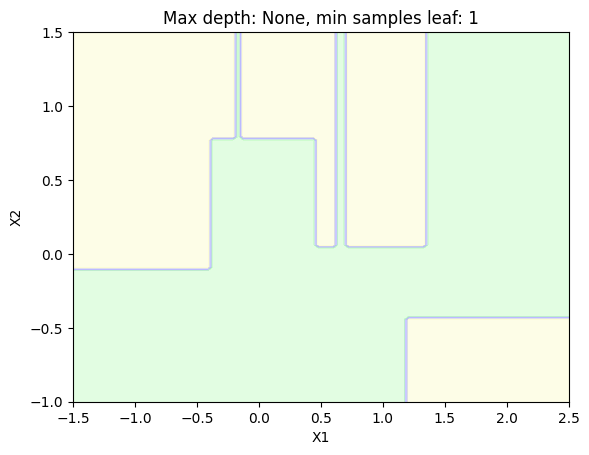

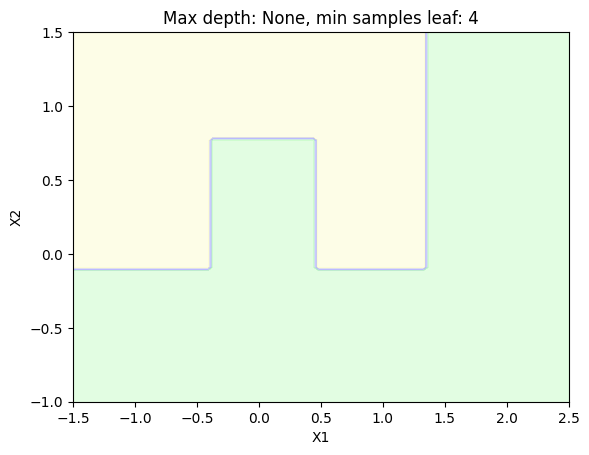

In [17]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

# This part would typically involve custom plotting functions
# to visualize the decision boundaries, similar to Figure 6-3 in the book.
# Example helper function (not from the book, but often used for such plots):
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "y.", label="Class 0")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "b.", label="Class 1")
    if legend:
        plt.legend(loc="lower right")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(f"Max depth: {clf.max_depth}, min samples leaf: {clf.min_samples_leaf}")
    plt.axis(axes)
    plt.show()

plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], plot_training=False)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], plot_training=False)

## 4. Regression with Decision Trees


### Creating some noisy quadratic data


In [18]:
X = np.random.rand(100, 1) * 6 - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

### Training a DecisionTreeRegressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [20]:
# To visualize this regression tree, you would use export_graphviz similar to classification
export_graphviz(
    tree_reg,
    out_file="regression_tree.dot",
    feature_names=["X"],
    rounded=True,
    filled=True
)

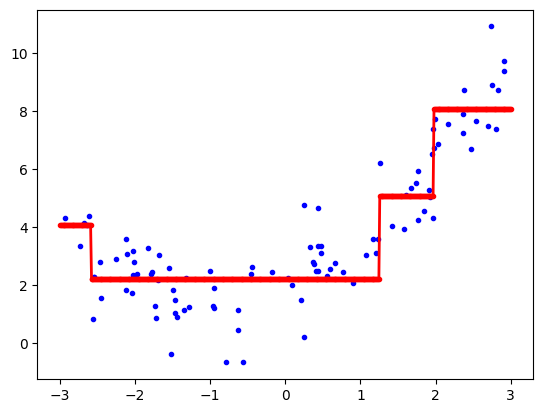

In [21]:
# Plotting the regression predictions.
# This part would typically involve custom plotting functions
# similar to Figure 6-5 in the book to show the step-like predictions.
x1 = np.linspace(-3, 3, 500).reshape(-1, 1)
y_pred = tree_reg.predict(x1)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred, "r.-", linewidth=2, label="predictions")
plt.show()

### Regressor with different max_depth

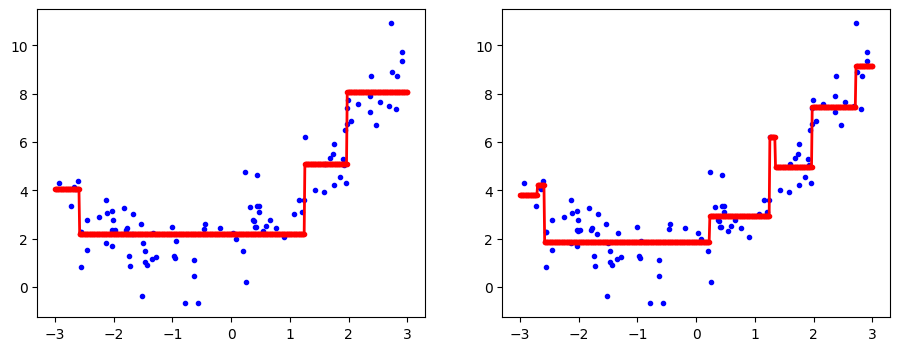

In [22]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# This part would involve plotting both regressors' predictions
# to show the effect of max_depth, similar to Figure 6-6 in the book.
x1 = np.linspace(-3, 3, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)
plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label="max_depth=2")
plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label="max_depth=3")
plt.show()